# Data Preprocessing Notebook

## Course: Data Visualization
## Professor: Dr. Tweneboah
## Author: Lucas Spitzer

### Import Necessary Packages

In [1]:
# Importing Pandas, Matplotlib, & Seaborb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the master CSV file into a dataframe.

In [2]:
# Load master dataframe
df = pd.read_csv("data/master.csv")

### 2. Basic descriptions of the data.

In [3]:
# Display dataframe appearance
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Model Name,Version Release Date,Benchmark,Benchmark Score,Organization,Country
0,Claude 2,2023-07-11,GPQA diamond,0.346591,Anthropic,United States of America
1,Claude 2,2023-07-11,MATH level 5,0.117258,Anthropic,United States of America
2,Claude 2.1,2023-11-21,GPQA diamond,0.329545,Anthropic,United States of America
3,Claude 3.5 Sonnet,2024-06-20,GPQA diamond,0.540404,Anthropic,United States of America
4,Claude 3.5 Sonnet,2024-06-20,MATH level 5,0.516805,Anthropic,United States of America


In [4]:
# Check for null values
print("Null values per column:")
df.isnull().sum()

Null values per column:


Model Name              0
Version Release Date    0
Benchmark               0
Benchmark Score         0
Organization            0
Country                 0
dtype: int64

In [5]:
# Display important information
print("DataFrame info:")
df.info()

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model Name            326 non-null    object 
 1   Version Release Date  326 non-null    object 
 2   Benchmark             326 non-null    object 
 3   Benchmark Score       326 non-null    float64
 4   Organization          326 non-null    object 
 5   Country               326 non-null    object 
dtypes: float64(1), object(5)
memory usage: 15.4+ KB


In [6]:
# Print quantitive column descriptive statistics
print("Descriptive stats for benchmark score:")
df.describe()

Descriptive stats for benchmark score:


,Benchmark Score
count,326.000000
mean,0.347465
std,0.282026
min,0.000000
25%,0.069444
50%,0.324337
75%,0.549874
max,0.978285


In [7]:
# Check for duplicates in the dataframe
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [8]:
# Print unique counts for models, organizations, and benchmarks
print(f"Unique models: {df['Model Name'].nunique()}")
print(f"Unique organizations: {df['Organization'].nunique()}")
print(f"Unique benchmarks: {df['Benchmark'].nunique()}")

Unique models: 81
Unique organizations: 14
Unique benchmarks: 6


In [9]:
# Print date range for model relase dates
try:
    df['Version Release Date'] = pd.to_datetime(df['Version Release Date'], errors='coerce')
    date_min = df['Version Release Date'].min().date()
    date_max = df['Version Release Date'].max().date()
    print(f"Data covers release dates from {date_min} to {date_max}")
except Exception:
    print("Unable to parse Version Release Date as datetime.")

Data covers release dates from 2023-06-13 to 2025-04-17


### 3. Analysis & visualization to identify key insights.

In [10]:
# Top 5 models overall
model_scores = df.groupby('Model Name')['Benchmark Score'].mean().sort_values(ascending=False)
top5_models = model_scores.head(5)
print("Top 5 models by average benchmark score:")
print(top5_models)

Top 5 models by average benchmark score:
Model Name
Gemini 2.5 Pro                   0.838384
DeepSeek-R1                      0.727006
DeepSeek-R1-Distill-Qwen-14B     0.659097
DeepSeek-R1-Distill-Llama-70B    0.656773
QWQ-Plus                         0.654040
Name: Benchmark Score, dtype: float64


/var/folders/pb/36ss_pfd11n9x0ppvvv71rr80000gn/T/ipykernel_92661/1130604623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_models.values, y=top5_models.index, palette=["#862633", "#CBA052", "#C41E1E", "#545658", "#D7D2CB"])


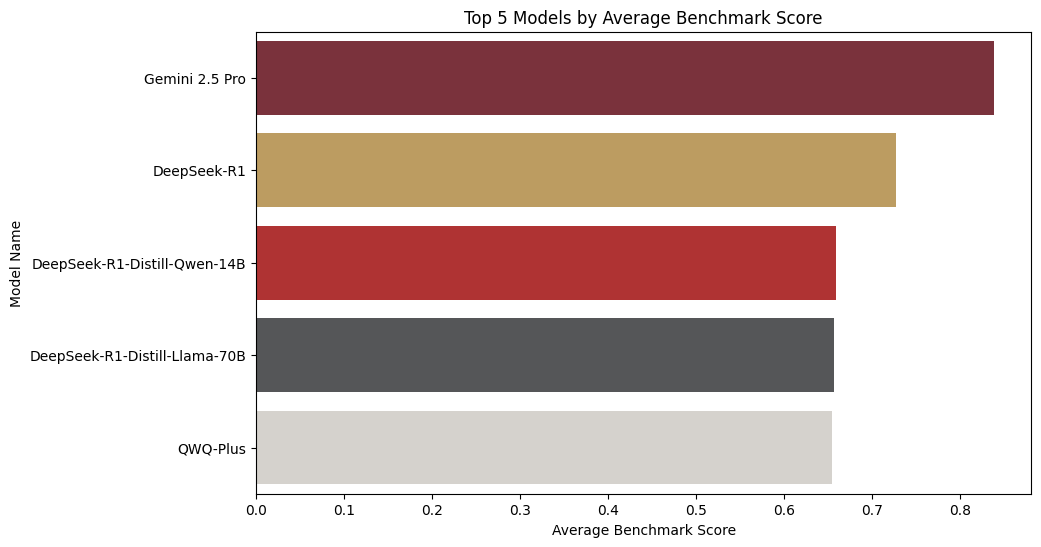

In [19]:
# Plot top 5 models
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_models.values, y=top5_models.index, palette=["#862633", "#CBA052", "#C41E1E", "#545658", "#D7D2CB"])
plt.title('Top 5 Models by Average Benchmark Score')
plt.xlabel('Average Benchmark Score')
plt.ylabel('Model Name')
plt.show()

In [16]:
# Top 5 organizations by average benchmark score since the start of 2024
df_since_2024 = df[df['Version Release Date'] >= pd.to_datetime('2024-01-01')]
org_scores = df_since_2024.groupby('Organization')['Benchmark Score'].mean().sort_values(ascending=False)
top5_orgs = org_scores.head(5)
print("Top 5 organizations by average benchmark score (since 2024-01-01):")
print(top5_orgs, "\n")

Top 5 organizations by average benchmark score (since 2024-01-01):
Organization
DeepSeek     0.541772
xAI          0.423101
OpenAI       0.421398
Alibaba      0.368389
Microsoft    0.359790
Name: Benchmark Score, dtype: float64 



/var/folders/pb/36ss_pfd11n9x0ppvvv71rr80000gn/T/ipykernel_92661/2181863586.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_orgs.values, y=top5_orgs.index, palette=["#862633", "#CBA052", "#C41E1E", "#545658", "#D7D2CB"])


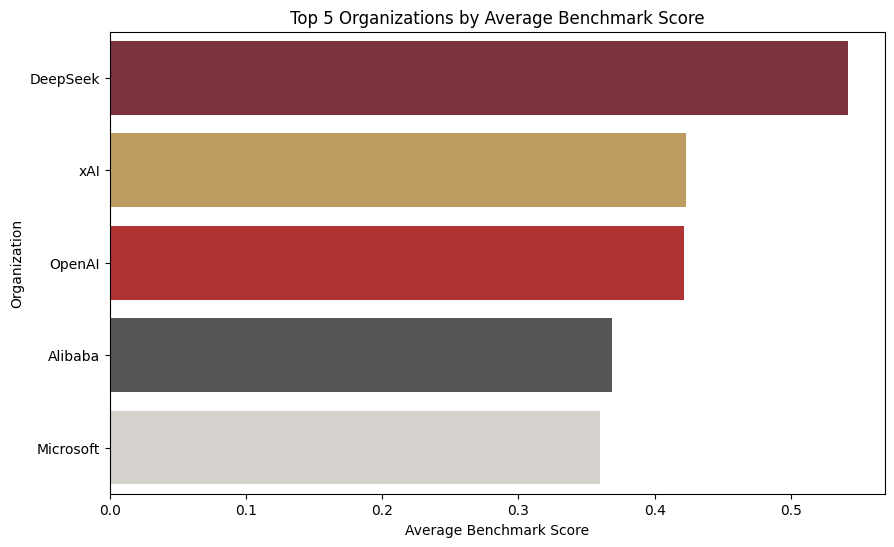

In [20]:
# Plot top 5 organizations
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_orgs.values, y=top5_orgs.index, palette=["#862633", "#CBA052", "#C41E1E", "#545658", "#D7D2CB"])
plt.title('Top 5 Organizations by Average Benchmark Score')
plt.xlabel('Average Benchmark Score')
plt.ylabel('Organization')
plt.show()

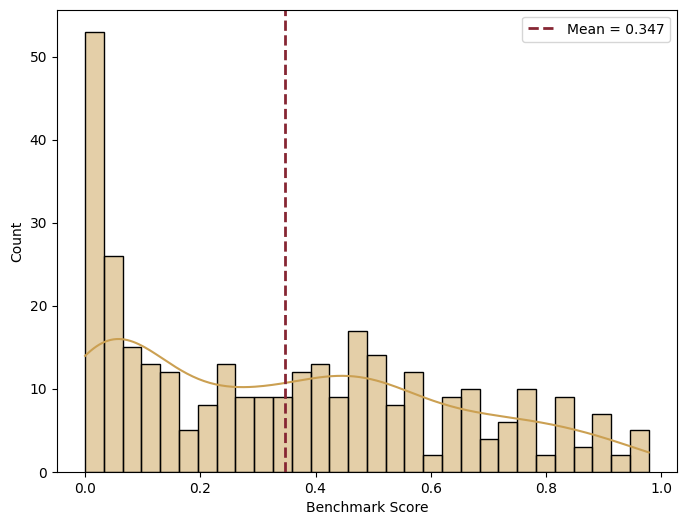

In [24]:
# Distribution of benchmark scores with custom colors
plt.figure(figsize=(8, 6))
sns.histplot(df['Benchmark Score'], bins=30, color="#CBA052", kde=True)
# Draw average line
mean_score = df['Benchmark Score'].mean()
plt.axvline(mean_score, color="#862633", linestyle="--", linewidth=2, label=f"Mean = {mean_score:.3f}")
plt.legend()